In [1]:
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("../../../")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics

from helpers.split import label_strings, tag_label_feature_split

In [2]:
# load data and separate one hot encoded labels from features,
# transform one hot encoded labels into label strings,
# then encode label strings

df = pd.read_pickle("../../../datasets/baseline_dataset_2.pickle")
_, one_hot_labels, X = tag_label_feature_split(df)
labels = label_strings(one_hot_labels)

le = LabelEncoder()
y = le.fit_transform(pd.Series.ravel(labels))

In [3]:
# take a look at our label classes
le.classes_

array(['genre_blues', 'genre_classical', 'genre_country', 'genre_disco',
       'genre_hiphop', 'genre_jazz', 'genre_metal', 'genre_pop',
       'genre_reggae', 'genre_rock'], dtype=object)

In [4]:
# dense encoded label classes
y

array([7, 9, 7, ..., 5, 7, 5])

In [5]:
# recover labels from dense encodings
le.inverse_transform(y)

array(['genre_pop', 'genre_rock', 'genre_pop', ..., 'genre_jazz',
       'genre_pop', 'genre_jazz'], dtype=object)

In [6]:
# divide into train and test data sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10, stratify=y
)

In [7]:
# take a look at the shapes of our data sets
# and the ratio of training set to test set

print(f"{X_train.shape=} {y_train.shape=}\n{X_test.shape=}   {y_test.shape=}")
print(f"ratio of train to test data set sizes = {round(len(y_train)/len(y_test), 3)}")

X_train.shape=(17080, 182) y_train.shape=(17080,)
X_test.shape=(4271, 182)   y_test.shape=(4271,)
ratio of train to test data set sizes = 3.999


In [8]:
# review distribution of labels overall
round(labels.value_counts() / len(labels), 3)

label          
genre_pop          0.250
genre_classical    0.247
genre_rock         0.187
genre_hiphop       0.100
genre_jazz         0.073
genre_reggae       0.046
genre_metal        0.039
genre_blues        0.022
genre_country      0.019
genre_disco        0.017
dtype: float64

In [9]:
# standardize features

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [10]:
# create logistic regression model
lr = LogisticRegression(
    C=100.0,
    solver="lbfgs",
    multi_class="multinomial",
    class_weight="balanced",
    max_iter=300,
)
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, class_weight='balanced', max_iter=300,
                   multi_class='multinomial')

In [11]:
predictions = lr.predict(X_test_std)

In [12]:
accuracy = lr.score(X_test_std, y_test)

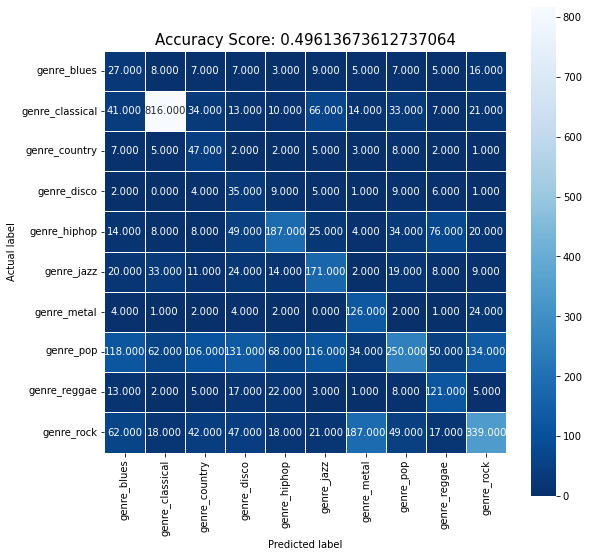

In [13]:
# generate confusion matrix and
# display nicely with seaborn
cm = metrics.confusion_matrix(y_test, predictions)
heatmap_labels = list(le.classes_)
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap="Blues_r",
           xticklabels=heatmap_labels, yticklabels=heatmap_labels)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title = "Accuracy Score: {0}".format(accuracy)
plt.title(all_sample_title, size=15);